### Importing libraries and loading digits

Shape dataset is (1797, 64) and each image is 8x8

Shape: (1797, 64)


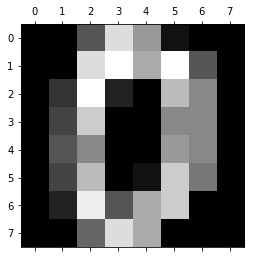

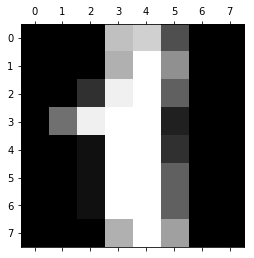

In [16]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance
import matplotlib.pyplot as plt

digits = load_digits(n_class=10, return_X_y=False)
print('Shape:', digits.data.shape)

plt.matshow(digits.images[0]) 
plt.matshow(digits.images[1]) 
plt.show() 

### Utilities and helpers

In [17]:
def show_result(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    # print("Mean squared error: %.2f" % np.mean((y_pred - y_true) ** 2))
    print('Accuracy score: %.2f' % accuracy_score(y_true, y_pred))
    print()
    print("Confusion Matrix")
    print(cm)

    area = np.pi * (10 * np.random.rand(len(y_pred)))**2
    colors = np.random.rand(len(y_pred))
    plt.scatter(y_true, y_pred, s=area, c=colors, alpha=0.5)

### Splitting data

In [18]:
(X_train, X_test, y_train, y_test) = train_test_split(digits.data, digits.target, test_size=0.2)

### Using KNeighborsClassifier from sklearn to test data

Accuracy score: 0.99

Confusion Matrix
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  1]
 [ 0  0  0  0  0 42  0  0  0  0]
 [ 0  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  0]
 [ 0  0  0  0  0  0  0  0 25  0]
 [ 0  0  0  2  0  1  0  0  0 32]]


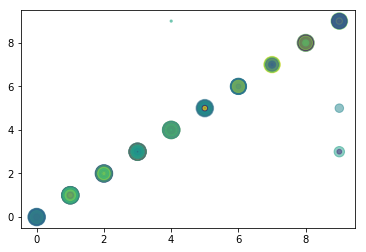

In [63]:
clf = KNeighborsClassifier(3)
clf.fit(X_train, y_train)
Y = clf.predict(X_test)

show_result(y_test, Y)

### Naive  kNN implementation

In [61]:
class NaiveKNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, X_test):
        res = np.zeros(len(X_test))
        for (i, t) in enumerate(X_test):
            srt = sorted(X_test, key=lambda x: distance.euclidean(x, t), reverse=True)
        return res

Accuracy score: 0.10

Confusion Matrix
[[37  0  0  0  0  0  0  0  0  0]
 [34  0  0  0  0  0  0  0  0  0]
 [39  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0]
 [39  0  0  0  0  0  0  0  0  0]
 [42  0  0  0  0  0  0  0  0  0]
 [31  0  0  0  0  0  0  0  0  0]
 [33  0  0  0  0  0  0  0  0  0]
 [25  0  0  0  0  0  0  0  0  0]
 [35  0  0  0  0  0  0  0  0  0]]


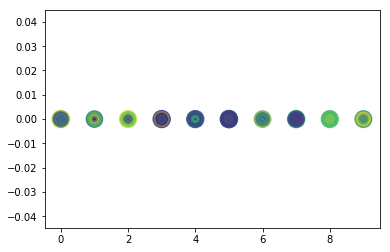

In [62]:
naive = NaiveKNN(3)
naive.fit(X_train, y_train)
Y = naive.predict(X_test)

show_result(y_test, Y)